In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


# Section1: Business Understanding
This was the first project from the udacity datascience nanodegree program where we were asked to take Airbnb data and test.

- Question1: What is correlation between reviews and price?
- Question2: What is the correlation between price and reviews on neighborhoods?
- Question3: What are the best seasons to increase price by owners?

# Section 2: Data Understanding

In [11]:
# Gather data
df_listing =pd.read_csv('../data/listings.csv')
df_reviews = pd.read_csv('../data/reviews.csv')
df_calendar = pd.read_csv('../data/calendar.csv')

In [12]:
# Asses datat
df_listing = df_listing.dropna(subset=["neighbourhood","amenities", "review_scores_rating", "price", "review_scores_value"])
# find null columns
df_listing.isnull().sum().sort_values(ascending=False)
# Provide a set of columns with more than 75% of the values missing
list(df_listing.columns[df_listing.isnull().mean() > 0.75])

['neighbourhood_group_cleansed',
 'square_feet',
 'has_availability',
 'license',
 'jurisdiction_names']

# Section 3: Data Preparation

In [13]:
# Clean data by remove null columns
df_listing.drop(columns=['neighbourhood_group_cleansed','jurisdiction_names','has_availability','license','square_feet'],inplace=True)

In [14]:
# Cleaned categorical data so that it could fit the model paramaters.
df_listing['price'] = df_listing['price'].replace('\$|,', '', regex=True)
df_listing['price'] = pd.to_numeric(df_listing['price'])
encoder = LabelEncoder()
df_listing['property_type']=encoder.fit_transform(df_listing['property_type'].astype('str'))
df_listing['room_type']=encoder.fit_transform(df_listing['room_type'].astype('str'))
df_listing['bed_type']=encoder.fit_transform(df_listing['bed_type'].astype('str'))
df_listing['neighbourhood']=encoder.fit_transform(df_listing['neighbourhood'].astype('str'))


In [15]:
# Analyze the data
# Select the numerical features
num_df = df_listing.select_dtypes(include=['float64', 'int64'])
num_cols = list(df_listing.select_dtypes(include=['float64', 'int64']).columns)
num_df=num_df.dropna()
num_df.head()
num_df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [16]:
# select the categorical features
cat_df = df_listing.select_dtypes(include=['object'])
cat_df.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'amenities', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'instant_bookable', 'cancel

In [17]:
# Analyzing data between categorical and numerical
print("There are {} numerical features".format(len(num_df.columns)))
print("There are {} categorical features".format(len(cat_df.columns)))

There are 33 numerical features
There are 57 categorical features


In [18]:
# Visualization function
def visualization(df, x, y):
    '''
    A way to visualize data
    
    Parameters:
    df - dataframe
    x - first column 
    y - second column

    Returns:
    A bar graph of two columns entered
    '''
    df.groupby(x)[y].count().sort_values(ascending=False).plot(kind='bar', color='red')
    plt.xlabel(x)
    plt.ylabel(y)

In [25]:
# Select features of importance
df_listing=df_listing[['price','property_type','room_type','bed_type','neighbourhood','review_scores_rating']]

# Section 4: Modeling

In [26]:
# Modeling

# Split into explanatory and response variables
X = df_listing.drop('price', axis=1)
y = df_listing['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

# Section 5: Evaluate the results

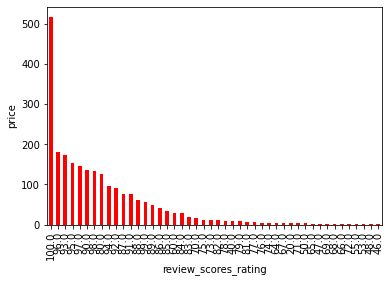

In [19]:
# Q1. What is the correlation between reveiws scores and prices?  (w Visualization)
visualization(df_listing, 'review_scores_rating', 'price')

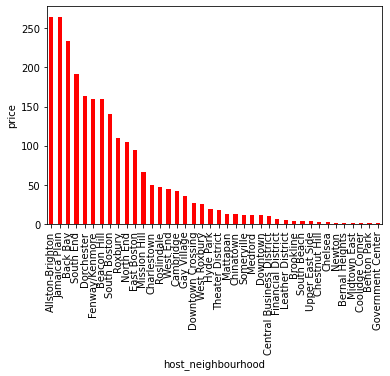

In [20]:
# Q2: What neighborhoods harber the best price for owners?  (w Visualization)
visualization(df_listing, 'host_neighbourhood', 'price')

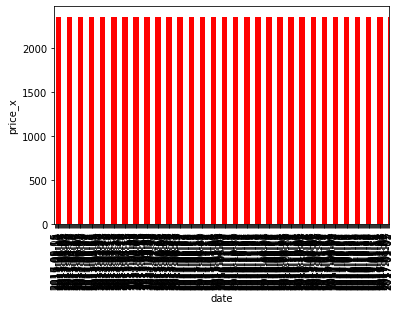

In [24]:
# Q3: What are the best seasons to increase price by owners? (w Visualization)
result = pd.merge(df_listing,df_calendar,left_on=['id'],right_on = ['listing_id'])
visualization(result, 'date', 'price_x')


In [27]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.30774727380418687.  The rsquared on the test data was 0.30912080113213214.
